# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
from sympy import diff, symbols, cos, sin, tan
x = symbols('x')
result = diff(tan(sin(x)+cos(2*x+3))**2, x)

x0 = 1
y0 = result.evalf(subs={x:x0})

print(f"Производная заданной ф-ии в точе x0 равна: {y0}")

Производная заданной ф-ии в точе x0 равна: 55.3859176353379


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

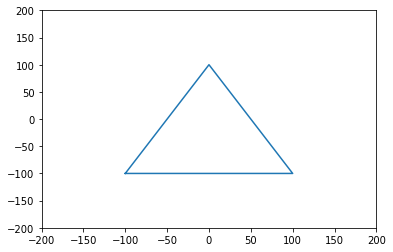

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

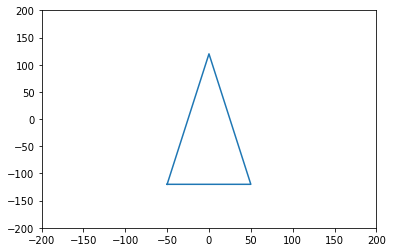

In [4]:
###Масштабирование на (0.5, 1.2)
B = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])
mult1 = B@A.T
res1 = mult1.T

x = res1[:,0]
y = res1[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(0.0, 500.0)

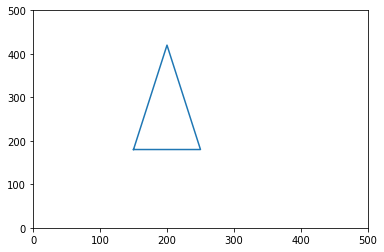

In [5]:
###Cмещение на (200, 300)
C = np.array([[200, 300, 0]])
mult2 = C+res1
res2 = mult2

x = res2[:,0]
y = res2[:,1]
plt.plot(x, y)
plt.ylim([0, 500])
plt.xlim([0, 500]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [6]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [7]:
vm = np.linalg.eig(m)
print(f"Собственные значения матрицы m: {vm[0][0]} и {vm[0][1]}")
print(f"Собственные векторы матрицы m: {vm[1][0]} и {vm[1][1]}")

Собственные значения матрицы m: 3.0000000000000004 и -0.9999999999999996
Собственные векторы матрицы m: [ 0.89442719 -0.89442719] и [0.4472136 0.4472136]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [8]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [9]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

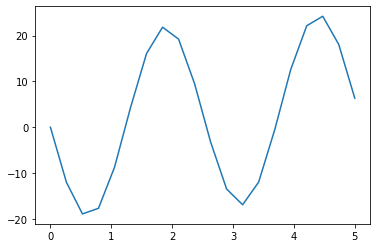

In [10]:
plt.plot(x, fx)
plt.show()

In [11]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

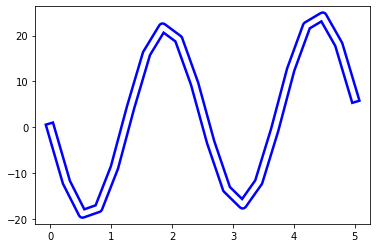

Оптимальные параметры a, b, минимизирующие абсолютную ошибку 'error': (2.999999998720649, 21.376104160465438)


In [61]:
x0 = [10, 10] #Подбирал вручную
res = minimize(error, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})

plt.plot(x, fx, c='blue', linewidth= 10) # Изначальный график
plt.plot(x, f(x, res.x[0], res.x[1]), c='white', linewidth= 5) # С предсказанными значениями
plt.show()

print(f"Оптимальные параметры a, b, минимизирующие абсолютную ошибку 'error': {res.x[0], res.x[1]}")

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [63]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [66]:
# Функция косинусного сходства
def cos(a, b):
    a_len = np.linalg.norm(a)
    b_len = np.linalg.norm(b)
    return np.dot(a, b) / (a_len*b_len)

In [96]:
# Matrix пстая матрица, которую заполняем рассчитанными косинусными расстояниями
matrix = np.zeros((10,10))
for i in range(len(raitings)):
    a = raitings[i]
    for j in range(len(raitings)): 
        b = raitings[j]
        res = cos(a, b)
        if i==j:
            res = 0
        matrix[i][j] = res

In [98]:
for i in range(len(matrix)):
    print(f"Для пользователя №{i+1} наиболее похожий пользователь №{np.argmax(matrix[i])+1}")

Для пользователя №1 наиболее похожий пользователь №9
Для пользователя №2 наиболее похожий пользователь №5
Для пользователя №3 наиболее похожий пользователь №10
Для пользователя №4 наиболее похожий пользователь №10
Для пользователя №5 наиболее похожий пользователь №9
Для пользователя №6 наиболее похожий пользователь №10
Для пользователя №7 наиболее похожий пользователь №4
Для пользователя №8 наиболее похожий пользователь №6
Для пользователя №9 наиболее похожий пользователь №1
Для пользователя №10 наиболее похожий пользователь №3
